In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from backtest_functions import *

In [21]:
path_to_folder = "C:/Users/phku0/Quant_Project"
df = pd.read_parquet(path_to_folder+'/data_processing/v3_cleaned.parquet')

df.rename({'month':'year_month'}, axis=1, inplace=True)
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month

print(df.shape)
print(df.columns)

(872206, 42)
Index(['year_month', 'cusip', 'ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'summary_length', 'pros_length',
       'cons_length', 'advice_length', 'summary_token_count',
       'pros_token_count', 'cons_token_count', 'advice_token_count',
       'summary_sentiment', 'pros_sentiment', 'cons_sentiment',
       'advice_sentiment', 'summary_token', 'pros_token', 'cons_token',
       'advice_token', 'innovative_llama', 'integrity_llama', 'quality_llama',
       'respect_llama', 'teamwork_llama', 'review_count', 'vol_forward_1m',
       'return_forward_1m', 'gsector', 'ggroup', 'gind', 'gsubind', 'year',
       'month'],
      dtype='object')


<Axes: xlabel='year_month'>

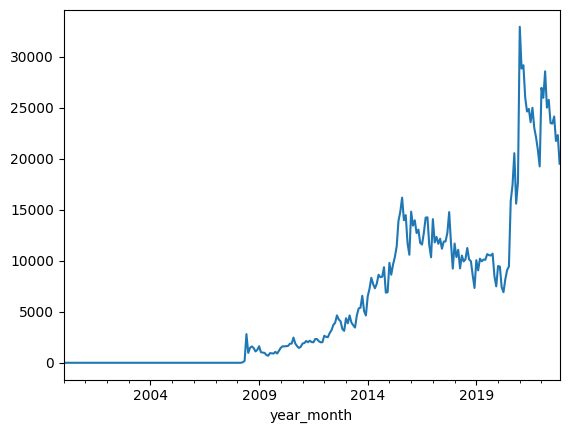

In [22]:
df.groupby('year_month')['review_count'].sum().plot()

In [23]:
df = df[df['year_month'] >= "2014-01"]

In [24]:
cols = ['ratingOverall', 'ratingCareerOpportunities', 'ratingCompensationAndBenefits', 
        'ratingCultureAndValues', 'ratingSeniorLeadership', 'ratingWorkLifeBalance', 
        'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo', 
        'ratingRecommendToFriend', 'summary_length', 'pros_length', 'cons_length', 
        'advice_length', 'summary_token_count', 'pros_token_count', 'cons_token_count', 
        'advice_token_count', 'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 
        'advice_sentiment', 'innovative_llama', 'integrity_llama', 'quality_llama', 
        'respect_llama', 'teamwork_llama']

for col in cols:
  df[col] = np.where(df.review_count >= 15, df[col], np.NaN)

In [25]:
# df['gsector'] = df['gsector'].astype('category')
# df['ggroup'] = df['ggroup'].astype('category')
# df['gind'] = df['gind'].astype('category')
# df['gsubind'] = df['gsubind'].astype('category')

df['gsector'] = df['gsector'].astype('float')
df['ggroup'] = df['ggroup'].astype('float')
df['gind'] = df['gind'].astype('float')
df['gsubind'] = df['gsubind'].astype('float')

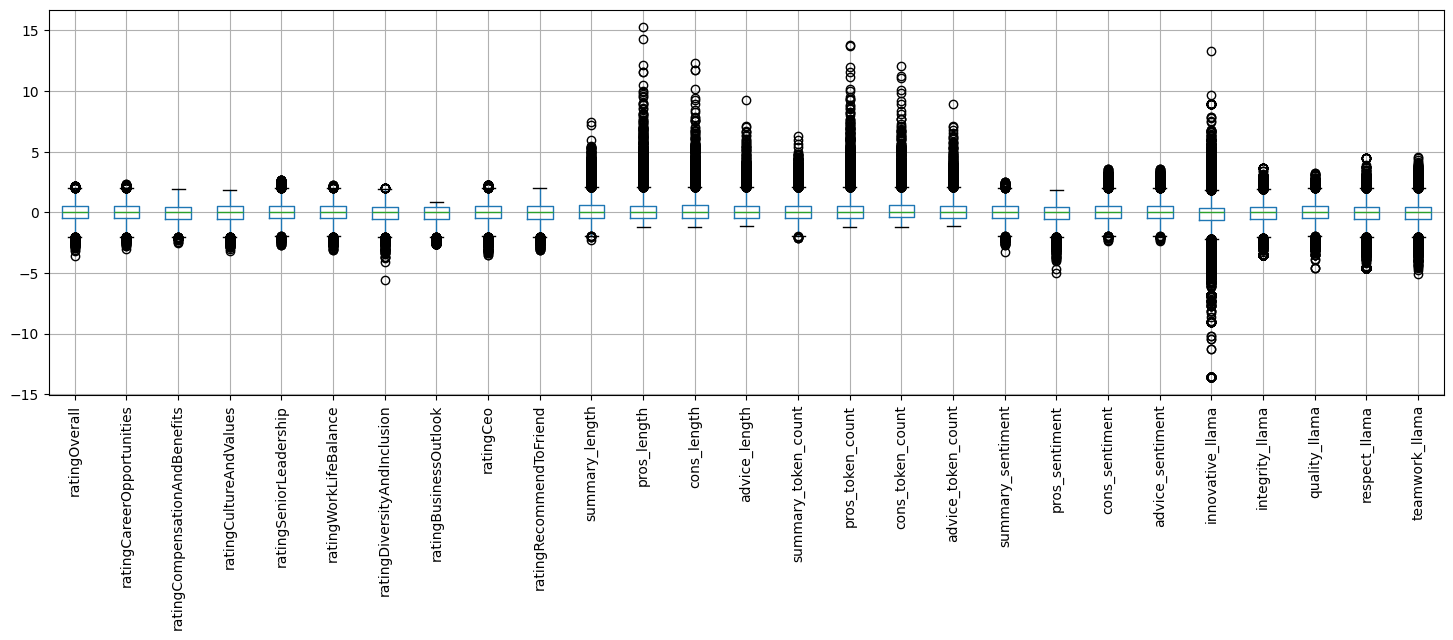

In [26]:
cols_features = ['ratingOverall', 'ratingCareerOpportunities',
                 'ratingCompensationAndBenefits', 'ratingCultureAndValues',
                 'ratingSeniorLeadership', 'ratingWorkLifeBalance',
                 'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
                 'ratingRecommendToFriend',
                 'summary_length', 'pros_length', 'cons_length', 'advice_length',
                 'summary_token_count', 'pros_token_count', 'cons_token_count', 'advice_token_count',
                 'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'advice_sentiment',
                 'innovative_llama', 'integrity_llama', 'quality_llama', 'respect_llama', 'teamwork_llama']

scaler = RobustScaler()
df2 = df.copy()
df2[cols_features] = scaler.fit_transform(df2[cols_features])

df2[cols_features].boxplot(figsize = (18,5))
plt.xticks(rotation=90)
plt.show()

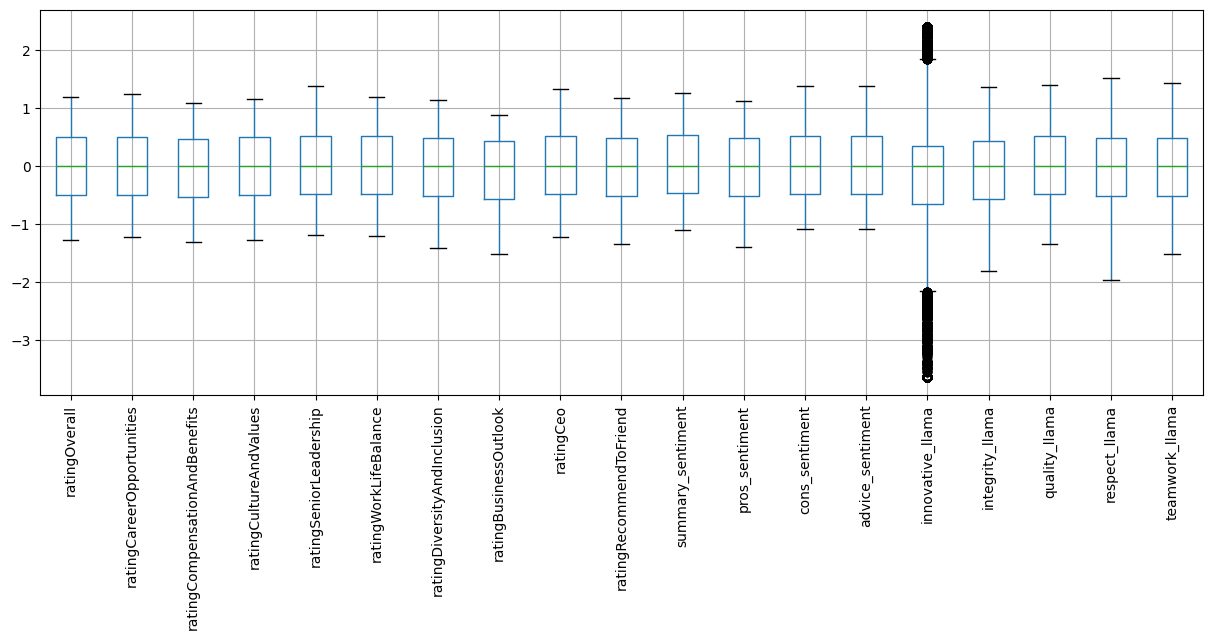

In [27]:
cols_to_scale = ['ratingOverall', 'ratingCareerOpportunities',
                 'ratingCompensationAndBenefits', 'ratingCultureAndValues',
                 'ratingSeniorLeadership', 'ratingWorkLifeBalance',
                 'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
                 'ratingRecommendToFriend',
                 'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'advice_sentiment',
                 'innovative_llama', 'integrity_llama', 'quality_llama', 'respect_llama', 'teamwork_llama']

lower_bound = df[cols_features].quantile(0.05)
upper_bound = df[cols_features].quantile(0.95)
df[cols_to_scale] = df[cols_to_scale].clip(lower=lower_bound, upper=upper_bound, axis=1)

scaler = RobustScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df[cols_to_scale].boxplot(figsize = (15,5))
plt.xticks(rotation=90)
plt.show()

In [28]:
df.drop(columns='innovative_llama', inplace=True)

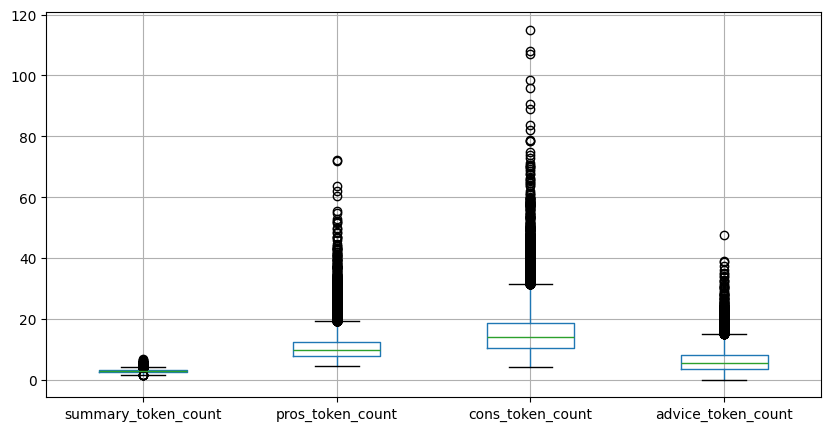

In [29]:
cols_no_scale = ['summary_token_count', 'pros_token_count', 'cons_token_count', 'advice_token_count']
# these outliers are useful

df[cols_no_scale].boxplot(figsize = (10,5))
plt.xticks(rotation=0)
plt.show()

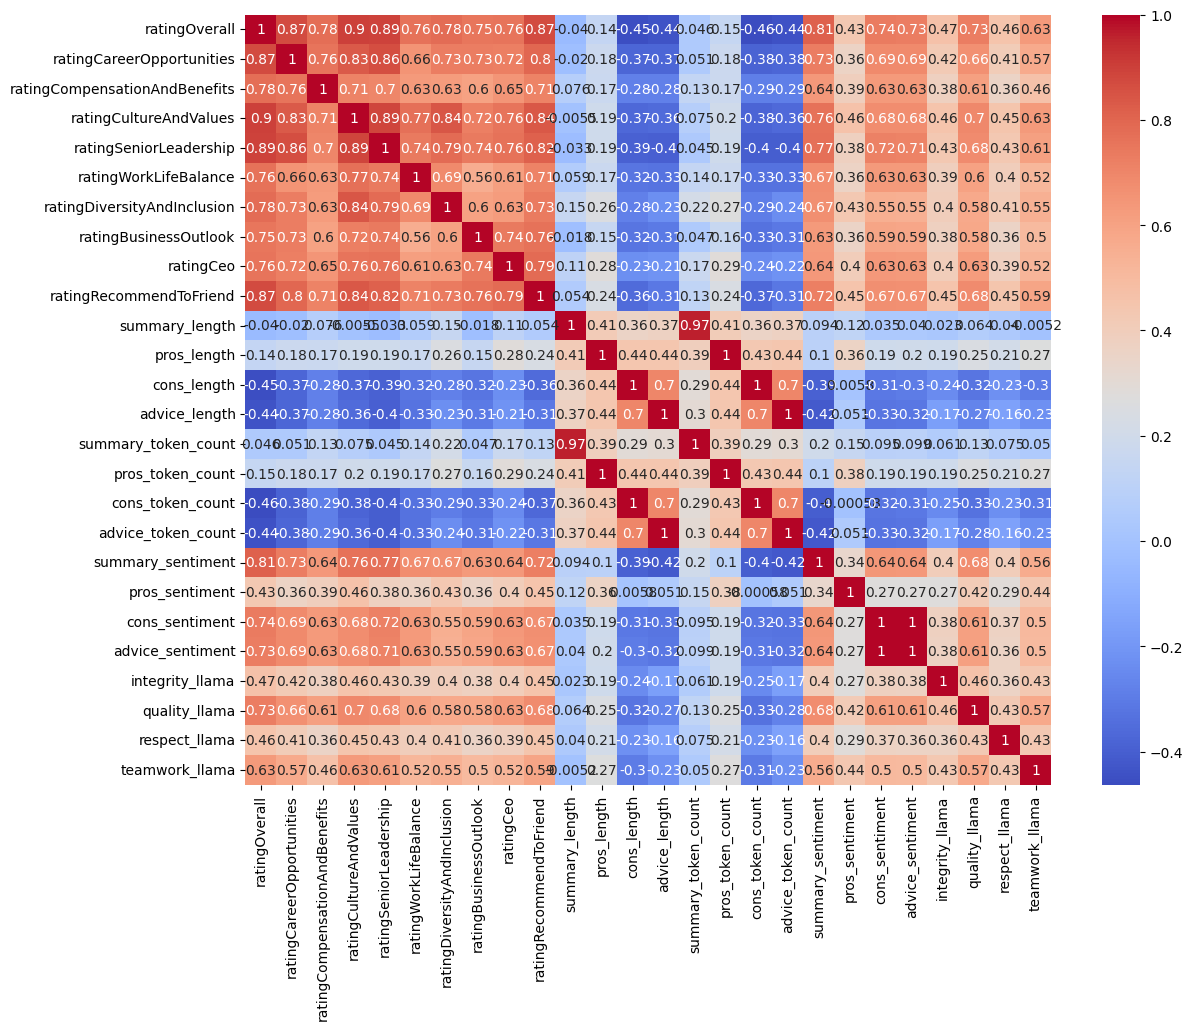

In [30]:
cols = ['ratingOverall', 'ratingCareerOpportunities',
        'ratingCompensationAndBenefits', 'ratingCultureAndValues',
        'ratingSeniorLeadership', 'ratingWorkLifeBalance',
        'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
        'ratingRecommendToFriend',
        'summary_length', 'pros_length', 'cons_length', 'advice_length',
        'summary_token_count', 'pros_token_count', 'cons_token_count', 'advice_token_count',
        'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'advice_sentiment',
        'integrity_llama', 'quality_llama', 'respect_llama', 'teamwork_llama']

corr_matrix = df[cols].corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [31]:
df

,year_month,cusip,ratingOverall,ratingCareerOpportunities,ratingCompensationAndBenefits,ratingCultureAndValues,ratingSeniorLeadership,ratingWorkLifeBalance,ratingDiversityAndInclusion,ratingBusinessOutlook,...,teamwork_llama,review_count,vol_forward_1m,return_forward_1m,gsector,ggroup,gind,gsubind,year,month
252,2014-01,10055710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1532800.0,0.136529,30.0,3020.0,302010.0,30201010.0,2014,1
253,2014-02,10055710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1580543.0,0.033708,30.0,3020.0,302010.0,30201010.0,2014,2
254,2014-03,10055710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1197393.0,0.005354,30.0,3020.0,302010.0,30201010.0,2014,3
255,2014-04,10055710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,1681607.0,-0.128557,30.0,3020.0,302010.0,30201010.0,2014,4
256,2014-05,10055710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1236788.0,0.042488,30.0,3020.0,302010.0,30201010.0,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873419,2016-08,U7260311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,3986129.0,0.033428,45.0,4510.0,451020.0,45102020.0,2016,8
873420,2016-09,U7260311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,3582748.0,-0.059299,45.0,4510.0,451020.0,45102020.0,2016,9
873421,2016-10,U7260311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,4781566.0,0.151863,45.0,4510.0,451020.0,45102020.0,2016,10
873422,2016-11,U7260311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,3183966.0,0.014925,45.0,4510.0,451020.0,45102020.0,2016,11


In [32]:
df.drop(columns=['summary_length', 'pros_length', 'cons_length', 'advice_length'], inplace=True)

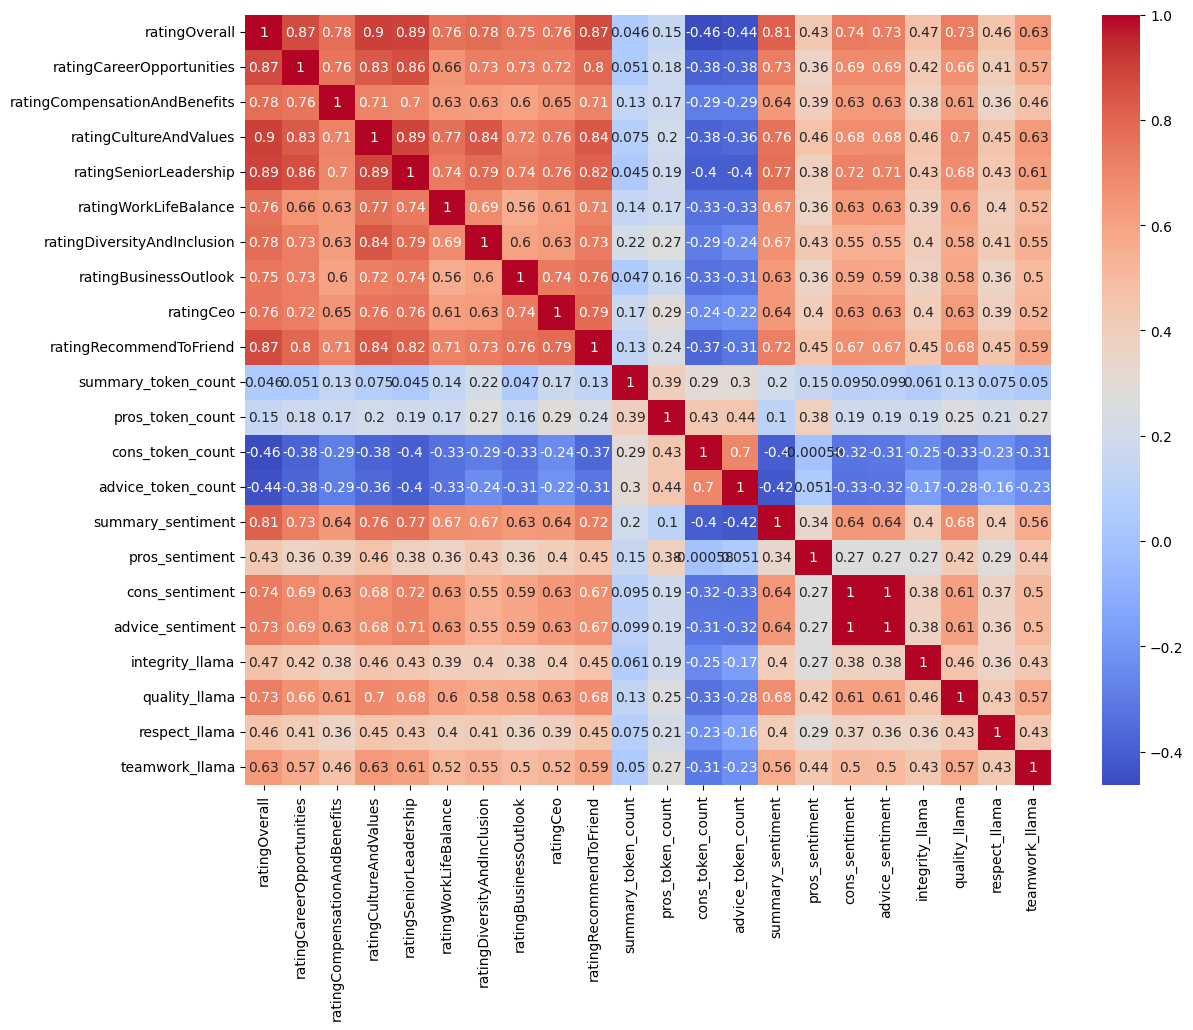

In [33]:
cols_features = ['ratingOverall', 'ratingCareerOpportunities',
                 'ratingCompensationAndBenefits', 'ratingCultureAndValues',
                 'ratingSeniorLeadership', 'ratingWorkLifeBalance',
                 'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
                 'ratingRecommendToFriend',
                 'summary_token_count', 'pros_token_count', 'cons_token_count', 'advice_token_count',
                 'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'advice_sentiment',
                 'integrity_llama', 'quality_llama', 'respect_llama', 'teamwork_llama']

corr_matrix = df[cols_features].corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [34]:
df.columns

Index(['year_month', 'cusip', 'ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'summary_token_count', 'pros_token_count',
       'cons_token_count', 'advice_token_count', 'summary_sentiment',
       'pros_sentiment', 'cons_sentiment', 'advice_sentiment', 'summary_token',
       'pros_token', 'cons_token', 'advice_token', 'integrity_llama',
       'quality_llama', 'respect_llama', 'teamwork_llama', 'review_count',
       'vol_forward_1m', 'return_forward_1m', 'gsector', 'ggroup', 'gind',
       'gsubind', 'year', 'month'],
      dtype='object')

Overall Annual Sharpe Ratio: 0.7615841652152359
--------------
Yearly Sharpe Ratio
year_month
2014    0.769588
2015    2.117947
2016   -0.234666
2017    2.519819
2018    2.184294
2019    2.115098
2020    0.595150
2021   -0.500588
2022   -0.734287
dtype: float64
--------------
Yearly Return (%)
year_month
2014     2.989864
2015     8.697774
2016    -1.104099
2017    14.451323
2018    12.863783
2019    16.103641
2020     9.156586
2021    -5.197625
2022    -3.046909
dtype: float64


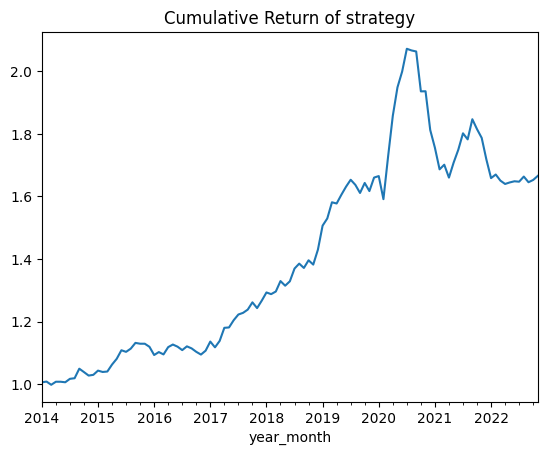

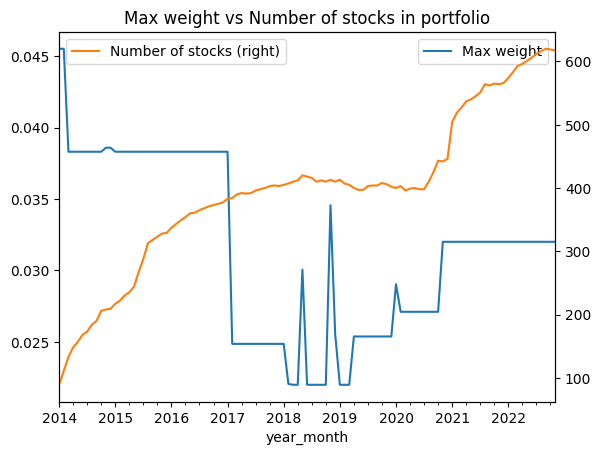

In [35]:
return_xnd = df[['year_month','cusip','return_forward_1m']].pivot(index = 'year_month', columns = 'cusip', values = 'return_forward_1m')

factor = 'ratingBusinessOutlook'

factor_xnd = df[['year_month','cusip',factor]].pivot(index = 'year_month', columns = 'cusip', values = factor)
factor_xnd = neutralise_by_group(factor_xnd, "gsubind")
# factor_xnd = factor_xnd * -1
factor_xnd = factor_xnd.rolling(36, min_periods = 1).mean()

portfolio_return = run_backtest(return_xnd, factor_xnd)
plot_backtest(portfolio_return)
plot_weights(factor_xnd)

### test correlation

In [36]:
correlations = df[['ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'summary_token_count',
       'pros_token_count', 'cons_token_count', 'advice_token_count',
       'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'review_count',
       'return_forward_1m'
]].corr()['return_forward_1m'].sort_values(ascending=False)

print(correlations)

return_forward_1m                1.000000
summary_sentiment                0.014331
summary_token_count              0.011029
ratingRecommendToFriend          0.010212
ratingWorkLifeBalance            0.009776
ratingOverall                    0.007935
ratingBusinessOutlook            0.006584
ratingCultureAndValues           0.005982
ratingSeniorLeadership           0.004904
pros_sentiment                   0.003560
cons_sentiment                   0.001718
review_count                     0.001482
ratingCompensationAndBenefits    0.001028
ratingCeo                       -0.000593
ratingCareerOpportunities       -0.003300
pros_token_count                -0.005963
ratingDiversityAndInclusion     -0.008197
advice_token_count              -0.013165
cons_token_count                -0.023967
Name: return_forward_1m, dtype: float64


In [37]:
cols = ['ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'summary_token_count',
       'pros_token_count', 'cons_token_count', 'advice_token_count',
       'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'review_count']

for col in cols:
  spearman_corr = df[col].corr(df['return_forward_1m'], method='spearman')
  print(col, spearman_corr)

ratingOverall 0.024627905289400048
ratingCareerOpportunities 0.01296357727490827
ratingCompensationAndBenefits 0.02291791838584159
ratingCultureAndValues 0.02460409307963531
ratingSeniorLeadership 0.020580818388480734
ratingWorkLifeBalance 0.0249006312648703
ratingDiversityAndInclusion -0.017214630402587177
ratingBusinessOutlook 0.03782605932705575
ratingCeo 0.024749272536849297
ratingRecommendToFriend 0.0314760290613956
summary_token_count 0.03139817068964888
pros_token_count -0.011892051060940339
cons_token_count -0.03351474110412574
advice_token_count -0.007465933527094977
summary_sentiment 0.02772743865191296
pros_sentiment 0.00898687800255387
cons_sentiment 0.019154769883725747
review_count 0.034464188942854905


----- ratingOverall VS revenue -----
linear correlation: 0.007934942890517263


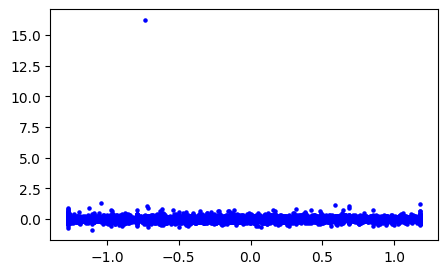

----- ratingCareerOpportunities VS revenue -----
linear correlation: -0.0032996671748185477


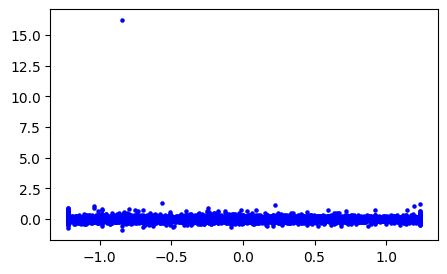

----- ratingCompensationAndBenefits VS revenue -----
linear correlation: 0.0010281214938157842


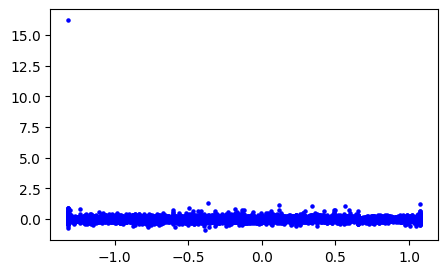

----- ratingCultureAndValues VS revenue -----
linear correlation: 0.005982262456142018


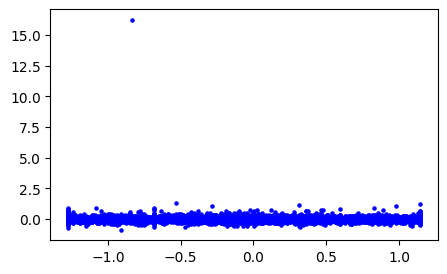

----- ratingSeniorLeadership VS revenue -----
linear correlation: 0.0049035509874233675


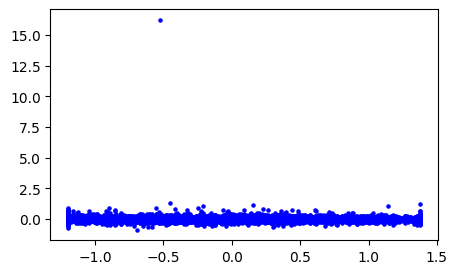

----- ratingWorkLifeBalance VS revenue -----
linear correlation: 0.009776252757067434


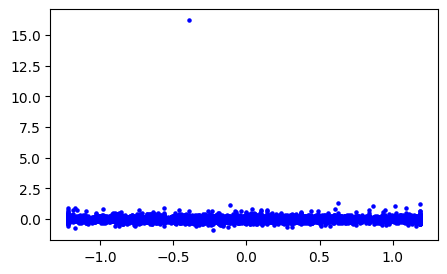

----- ratingDiversityAndInclusion VS revenue -----
linear correlation: -0.008196942487977503


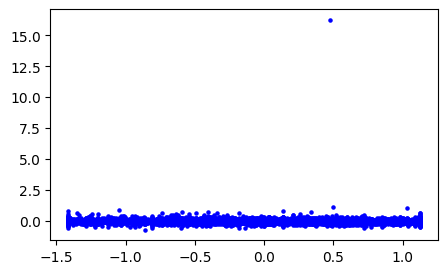

----- ratingBusinessOutlook VS revenue -----
linear correlation: 0.006583806542780116


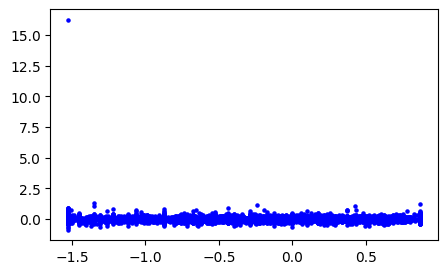

----- ratingCeo VS revenue -----
linear correlation: -0.0005930532034406712


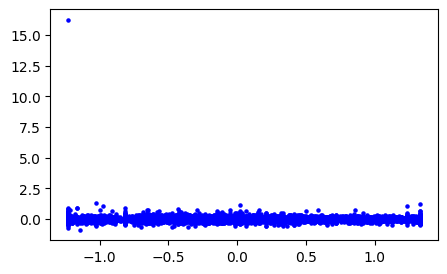

----- ratingRecommendToFriend VS revenue -----
linear correlation: 0.010212157918332774


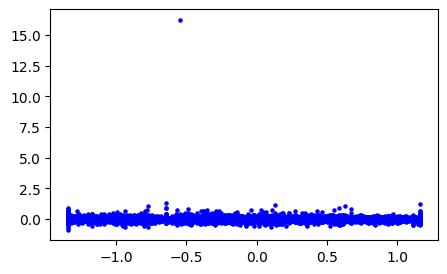

----- summary_token_count VS revenue -----
linear correlation: 0.011028798596202042


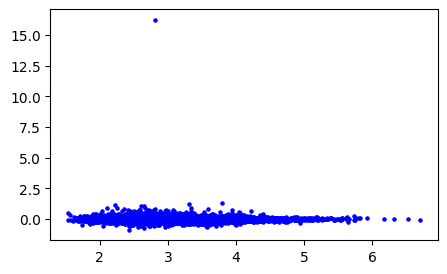

----- pros_token_count VS revenue -----
linear correlation: -0.005963491837771762


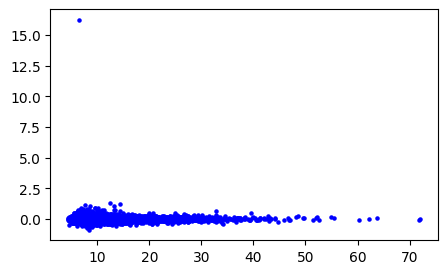

----- cons_token_count VS revenue -----
linear correlation: -0.0239672566289801


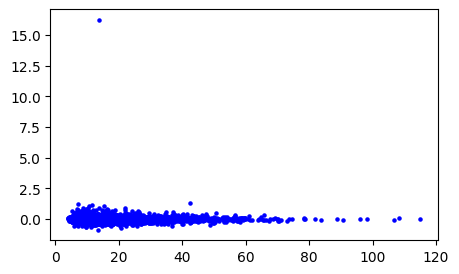

----- advice_token_count VS revenue -----
linear correlation: -0.013164687981642513


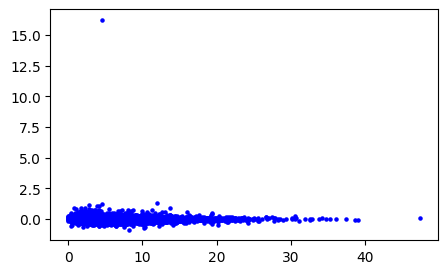

----- summary_sentiment VS revenue -----
linear correlation: 0.014330857412034877


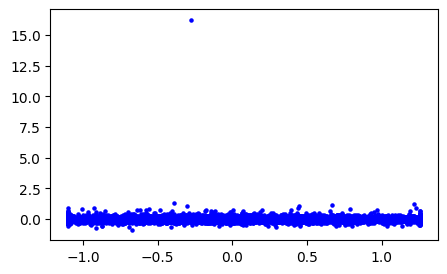

----- pros_sentiment VS revenue -----
linear correlation: 0.0035598416106550276


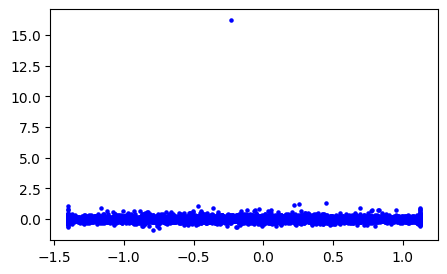

----- cons_sentiment VS revenue -----
linear correlation: 0.0017184176533939185


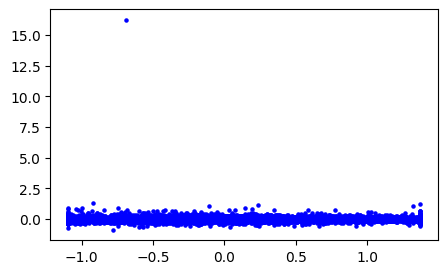

----- review_count VS revenue -----
linear correlation: 0.0014815365144827304


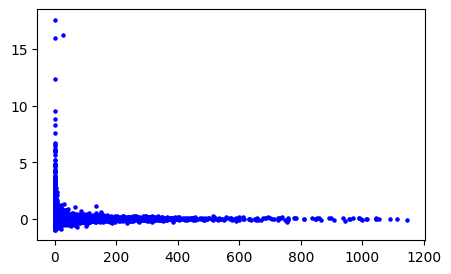

----- gsector VS revenue -----
linear correlation: 0.0019463065285172164


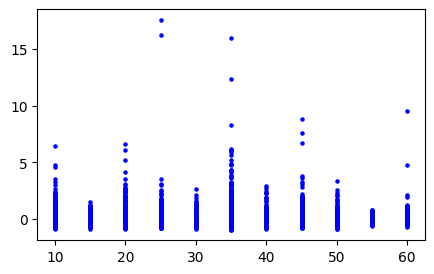

----- ggroup VS revenue -----
linear correlation: 0.0019498513933964927


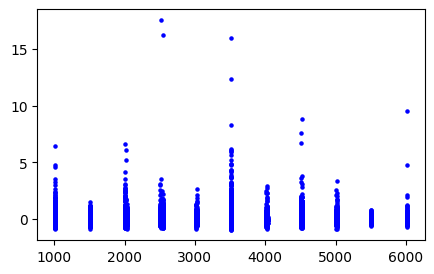

----- gind VS revenue -----
linear correlation: 0.0019499866945466165


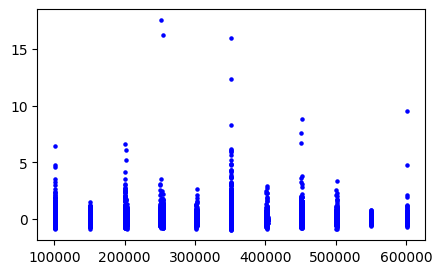

----- gsubind VS revenue -----
linear correlation: 0.0019499878112975858


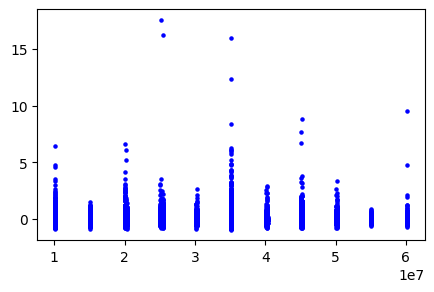

In [38]:
features_cols = ['ratingOverall', 'ratingCareerOpportunities',
       'ratingCompensationAndBenefits', 'ratingCultureAndValues',
       'ratingSeniorLeadership', 'ratingWorkLifeBalance',
       'ratingDiversityAndInclusion', 'ratingBusinessOutlook', 'ratingCeo',
       'ratingRecommendToFriend', 'summary_token_count',
       'pros_token_count', 'cons_token_count', 'advice_token_count',
       'summary_sentiment', 'pros_sentiment', 'cons_sentiment', 'review_count',
       'gsector', 'ggroup', 'gind', 'gsubind']

for feature in features_cols:
  plt.figure(figsize=(5, 3))
  print(f'----- {feature} VS revenue -----')
  print('linear correlation:', df[feature].corr(df['return_forward_1m']))
  plt.scatter(df[feature], df['return_forward_1m'], color='blue', s=5)
  plt.show()